In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
# Set style
plt.style.use('fivethirtyeight')

# Data Importing

In [2]:
df = pd.read_csv('august_new_user.csv')
orders = pd.read_csv('august_orders.csv')
orders.columns

Index(['order_id', 'timestamp', 'user_id', 'price', 'currency'], dtype='object')

In [3]:
df.head(5)

,user_id;country;platform;region;install_date;registration_method
0,6308043896014c73dcf32a31;United States;Android...
1,6306db81369dcd076fe633a9;United States;Android...
2,63088574369dcd2015e63576;United States;Android...
3,6305ca8e96014c4c97f32c8c;United States;Android...
4,6308db02624c2649e15a5bac;United States;Android...


# Data Wrangling

In [4]:
#cleaning the users dataset
users = df['user_id;country;platform;region;install_date;registration_method'].str.split(';', expand=True).rename(columns={0:'user_id', 1:'country', 2:'platform',3:'region', 4:'install_date', 5:'registration_method'})

In [5]:
#merging users dataset to orders dataset
#and format the datetime
data_1 = users.merge(orders, how='inner', on =['user_id'])
data_1['install_date'] = pd.to_datetime(data_1['install_date'])
data_1['timestamp'] = pd.to_datetime(data_1['timestamp'])
data_1['timestamp'] = data_1['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')
data_1['install_date'] = data_1['install_date'].dt.strftime('%Y-%m-%d %H:%M:%S')
data_1['install_date'] = pd.to_datetime(data_1['install_date'])
data_1['timestamp'] = pd.to_datetime(data_1['timestamp'])

In [6]:
data_1.head(10)

,user_id,country,platform,region,install_date,registration_method,order_id,timestamp,price,currency
0,62fb16bd96014c22dbc3ed86,United States,Android,Texas,2022-08-15 23:02:09,email,62fb1bfd624c265b04962b72,2022-08-16 04:24:29,0.75,USD
1,62f26e2896014c0e8652b6e9,United States,Android,Kentucky,2022-08-09 10:24:42,facebook,62f27282369dcd0856cf47f5,2022-08-09 14:43:14,7.48,USD
2,62f26e2896014c0e8652b6e9,United States,Android,Kentucky,2022-08-09 10:24:42,facebook,62f27ab1369dcd7b9bcf45e0,2022-08-09 15:18:09,10.50,USD
3,62f26e2896014c0e8652b6e9,United States,Android,Kentucky,2022-08-09 10:24:42,facebook,62f27e8a96014c097c52b693,2022-08-09 15:34:33,37.18,USD
4,62ec167596014c344b7367de,United States,Android,Georgia,2022-08-04 14:56:54,email,62ec1b50624c263c980ee071,2022-08-04 19:17:36,5.65,USD
5,6304c492624c261fb73547eb,United States,Android,Georgia,2022-08-23 08:14:15,facebook,6304c72c369dcd0188e63298,2022-08-23 12:25:16,7.76,USD
6,6304c492624c261fb73547eb,United States,Android,Georgia,2022-08-23 08:14:15,facebook,63061e45624c266eee3545b7,2022-08-24 12:49:09,0.00,USD
7,6304c492624c261fb73547eb,United States,Android,Georgia,2022-08-23 08:14:15,facebook,63061fd296014c27ebf32aa4,2022-08-24 12:55:46,0.00,USD
8,62f575b8624c265437df0bb0,United States,Web,Mississippi,2022-08-18 17:43:08,email,62f576e6624c2606e0df0a44,2022-08-11 21:38:46,9.93,USD
9,62f575b8624c265437df0bb0,United States,Web,Mississippi,2022-08-18 17:43:08,email,62fedf4096014c1d17491d1b,2022-08-19 00:54:24,3.35,USD


# Data Analysis

In [7]:
#filter out users who have installed the app in August
data_1 = data_1[data_1['install_date'] >= '2022-08-01 00:58:00']

In [8]:
print('Total number of new users in August: ',len(data_1['user_id'].unique()))

Total number of new users in August:  4674


C:\Users\msquy\AppData\Local\Temp/ipykernel_6684/572600048.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(count_user_co.index, rotation=90)
C:\Users\msquy\AppData\Local\Temp/ipykernel_6684/572600048.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(count_ord_co.index, rotation=90)
C:\Users\msquy\AppData\Local\Temp/ipykernel_6684/572600048.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(avg_ord_co.index, rotation=90)


Text(0, 0.5, 'Average order')

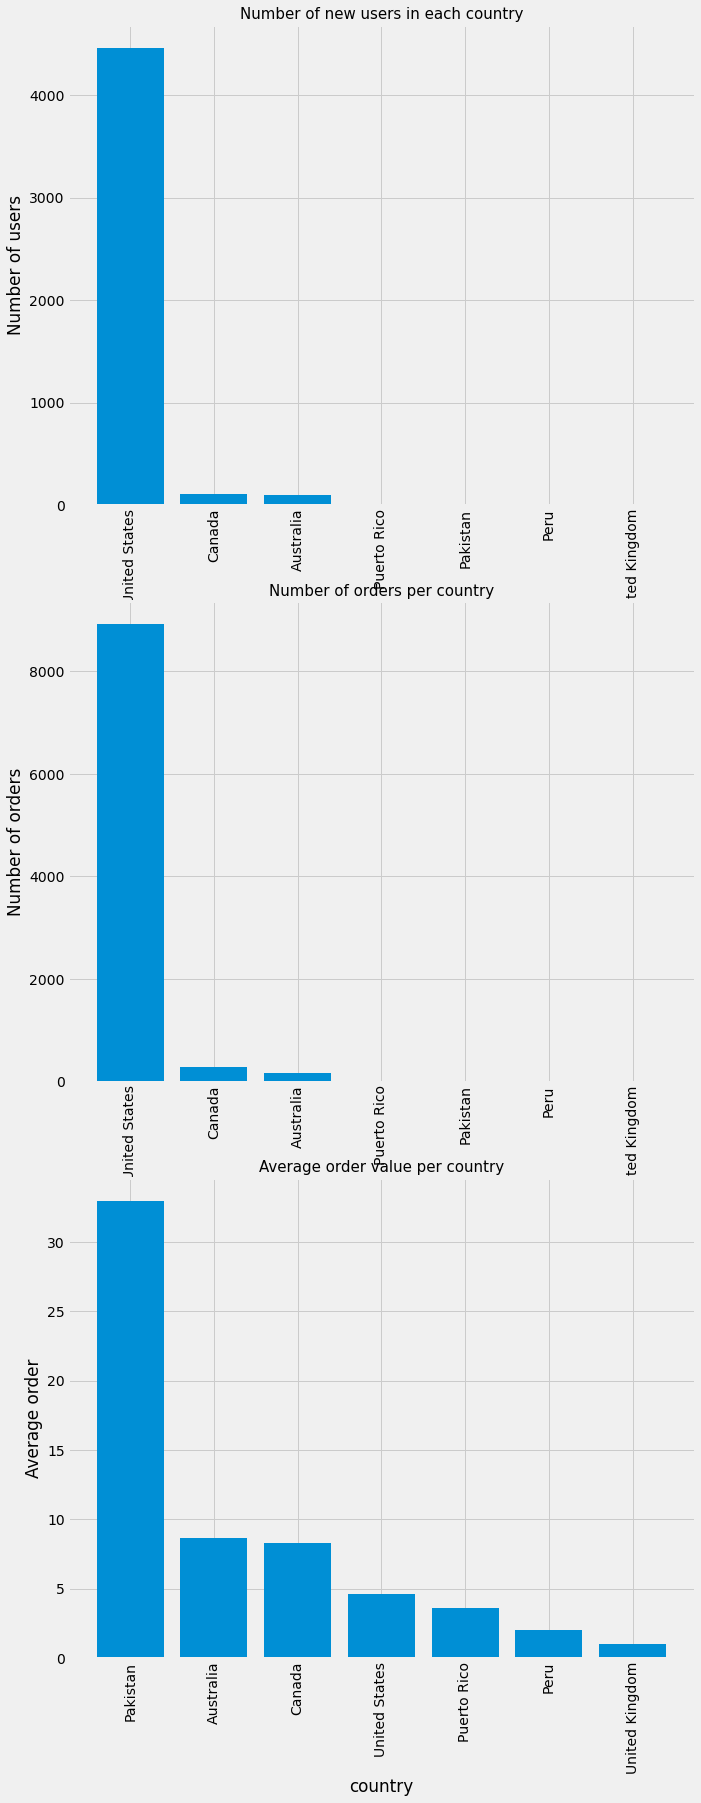

In [9]:
#number of new users in each country
count_user_co= data_1.groupby('country')['user_id'].nunique()
count_user_co= count_user_co.sort_values(ascending=False)

#number of orders per country
count_ord_co=data_1.groupby('country')['order_id'].count()
count_ord_co= count_ord_co.sort_values(ascending=False)

#average order value per region
avg_ord_co = data_1.groupby('country')['price'].mean()
avg_ord_co = avg_ord_co.sort_values(ascending=False)


# Visualising data
fig, axes = plt.subplots(3, 1, figsize = (10,28))
axes[0].set_title('Number of new users in each country', size = 15)
axes[0].bar(count_user_co.index, count_user_co.values)
axes[0].set_xlabel('country')
axes[0].set_xticklabels(count_user_co.index, rotation=90)
axes[0].set_ylabel('Number of users')

axes[1].set_title('Number of orders per country', size = 15)
axes[1].bar(count_ord_co.index, count_ord_co.values)
axes[1].set_xlabel('country')
axes[1].set_xticklabels(count_ord_co.index, rotation=90)
axes[1].set_ylabel('Number of orders')

axes[2].set_title('Average order value per country', size = 15)
axes[2].bar(avg_ord_co.index, avg_ord_co.values)
axes[2].set_xlabel('country')
axes[2].set_xticklabels(avg_ord_co.index, rotation=90)
axes[2].set_ylabel('Average order')


Pakistan has only 1 order but with very high AOV. 99% of the installation happened in US. 

In [10]:
# Aggregate the data
purchase_summary = data_1.agg({'price': ['mean', 'median', 'std']})
purchase_summary

,price
mean,4.771019
median,0.750000
std,15.430440


# Time decay of conversion

C:\Users\msquy\AppData\Local\Temp/ipykernel_6684/3106967349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy['diff_time'] = df_buy['timestamp']-df_buy['install_date']
C:\Users\msquy\AppData\Local\Temp/ipykernel_6684/3106967349.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_buy['diff_time'] = df_buy['diff_time'].map(lambda x : x.days)
C:\Users\msquy\AppData\Local\Temp/ipykernel_6684/3106967349.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

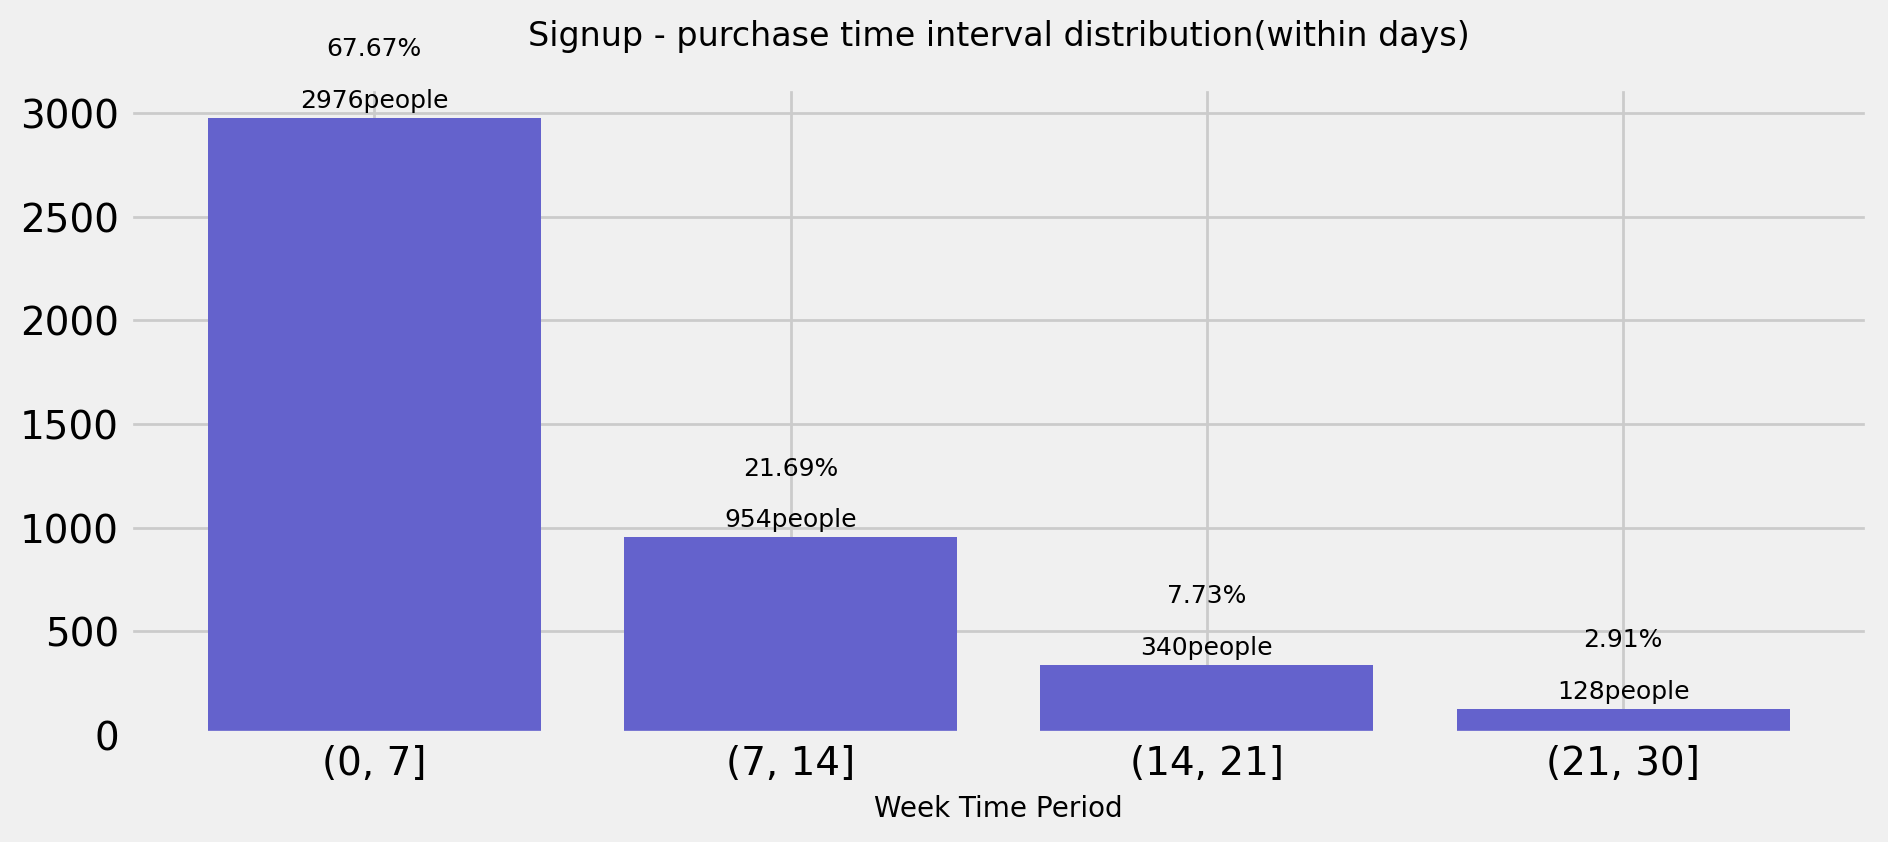

In [11]:
df_buy = data_1[['user_id', 'install_date', 'timestamp', 'price']]
df_buy['diff_time'] = df_buy['timestamp']-df_buy['install_date']

# Time format conversion, unit: hour
df_buy['diff_time'] = df_buy['diff_time'].map(lambda x : x.days)


# Group 4 time windows
bins = [0,7,14,21,30]
df_buy['time_bins'] = pd.cut(df_buy['diff_time'],bins=bins,include_lowest=False)

# Statistics by group, drawing
df = df_buy.groupby('time_bins').user_id.count()

plt.figure(figsize=(10,4),dpi=200)
plt.subplot(111,facecolor="#F0F0F0")

rects = plt.bar(range(0,len(df.index)),df.values,color="#6462cc")
plt.xticks(range(0,len(df.index)),df.index)
plt.xlabel("Week Time Period",fontsize=10)
plt.title("Signup - purchase time interval distribution(within days)",pad=15,fontsize=12)

# Set data label
count=0
Sum=df.sum()
for rect in rects:
    height = rect.get_height()   
    rect_x = rect.get_x()        
    
    plt.text(rect.get_x() + rect.get_width()/2,height+50,str(height)+'people', ha='center',fontsize=9)
    plt.text(rect.get_x() + rect.get_width()/2,height+300,str('{:.2f}'.format(df.values[count]/Sum *100)) + "%",ha='center',fontsize=9) 
    count=count+1

As can be seen from the above figure, in one month, nearly 68% of users who signed up and completed purchases within 1 week, and only 3% made a purchase over a period of one month after signing up. It can be inferred that the user's intention to purchase is strongest right after registration so it's best to upsell or cross-sale them as much as we can during their first purchase. 

In [12]:
df_7 = df_buy[df_buy['diff_time'] <=7 ]
df_14 = df_buy[(df_buy['diff_time'] > 7) & (df_buy['diff_time'] <=14)]
df_30 = df_buy[df_buy['diff_time'] > 14]
aov_7 = df_7['price'].mean()
aov_14 = df_14['price'].mean()
aov_30 = df_30['price'].mean()
print('AOV of users who converted within a week: ',aov_7)
print('AOV of users who converted within 2 weeks: ',aov_14)
print('AOV of users who converted within a month: ',aov_30)

AOV of users who converted within a week:  5.096616446955497
AOV of users who converted within 2 weeks:  2.9307023060796626
AOV of users who converted within a month:  2.981025641025641


**The faster they convert, the higher the users are willing to pay**

# **Repurchase Rate**

In [13]:
#set current date
current_date = max(data_1['timestamp'])
current_date = pd.to_datetime(current_date)
current_date

Timestamp('2022-08-31 23:57:39')

For the convenience of this analysis, since the dataset contains users from August as a best practice let's determine that the max ``timestamp`` in August is current date or max purchase day to set KPIs. Specifically, I'll calculate the average amount paid per purchase within a user's specific timeframe using the ``timestamp`` as purchase_date from the dataset.

Subtract timedelta(days=x) from ``current_date`` to find the last date that we will count purchases from.

In [14]:
#define a function to filter out time decay dataframe
from datetime import timedelta
def df_purchase_days(df, delta):
    # Compute max_purchase_date
    max_purchase_date = current_date - timedelta(days=delta)

    # Filter to only include users who registered before our max date
    df = df[(df.install_date < max_purchase_date)]

    
    df = df[(df.timestamp <= df.install_date + timedelta(days=delta))]
    df['timestamp'] = df.timestamp.apply(lambda ts: ts.strftime('%Y-%m-%d'))
    return df

As the dataset contains 30 days of data, I want to slice the dataset into 2 seperates dataframes which contain the users converting in different timestamp being the first week and the next 3 weeks. For the purpose of repurchase rate calculating, the first week converted user dataframe will be divided into 2 time windows, each of which has a length of 3 days. Likewise, the next-3-week purchaser will be devided in into 3 time windows, with 7-day-period each. 


In [15]:
#assign the time decay purchase to a new dataset
df_6 = df_purchase_days(data_1, delta=6)
df_21 = df_purchase_days(data_1, delta=21)

In [16]:
df_6['timestamp'].max()

'2022-08-31'

In [17]:
# Add a new column to set the date of the same time window to the day with the largest date
df_6['timestamp'] = pd.to_datetime(df_6['timestamp'])

for m, n in zip(range(1, 7), df_6.timestamp.unique()):
    if m % 2 == 0:
        df_6.loc[((df_6.timestamp + np.timedelta64(0,"D"))<= n) & ((df_6.timestamp + np.timedelta64(2,"D") >= n)), 'date1'] = n
# Group by time window
df_buy_back = df_6.groupby('date1').user_id.unique()

# Define an empty list, record the corresponding time window and repurchase rate
days = []
back_buy_rates = []

# Calculation of repurchase rate
for i in range(0,len(df_buy_back.index)-1):
    users = df_buy_back.values[i].tolist()   # Get the user ID of a time window
    count=0
    
    for user in users:
        if user in df_buy_back.values[i+1].tolist():    # If the user also consumes in the next time window, count 1
            count += 1
            
    # Calculate the repo rate and record       
    buy_back_rate = count/len(users)
    back_buy_rates.append(buy_back_rate)
    
    # Record the corresponding time window information
    days.append(df_buy_back.index.tolist()[i])

# Generate DataFrame output
back_buy_rate = pd.DataFrame({'date': days, 'buy_back_rate': back_buy_rates})

back_buy_rate       

,date,buy_back_rate
0,2022-08-09,0.119247
1,2022-08-11,0.007767


In [18]:
df_21['timestamp'] = pd.to_datetime(df_21['timestamp'])

for m, n in zip(range(1, 22), df_21.timestamp.unique()):
    if m % 3 == 0:
        df_21.loc[((df_21.timestamp + np.timedelta64(0,"D"))<= n) & ((df_21.timestamp + np.timedelta64(2,"D") >= n)), 'date1'] = n
# Group by time window
df_buy_back = df_21.groupby('date1').user_id.unique()

# Define an empty list, record the corresponding time window and repurchase rate
days = []
back_buy_rates = []

# Calculation of repurchase rate
for i in range(0,len(df_buy_back.index)-1):
    users = df_buy_back.values[i].tolist()   # Get the user ID of a time window
    count=0
    
    for user in users:
        if user in df_buy_back.values[i+1].tolist():    # If the user also consumes in the next time window, count 1
            count += 1
            
    # Calculate the repo rate and record       
    buy_back_rate = count/len(users)
    back_buy_rates.append(buy_back_rate)
    
    # Record the corresponding time window information
    days.append(df_buy_back.index.tolist()[i])

# Generate DataFrame output
back_buy_rate = pd.DataFrame({'date': days, 'buy_back_rate': back_buy_rates})

back_buy_rate       

,date,buy_back_rate
0,2022-08-02,0.120755
1,2022-08-05,0.134551
2,2022-08-08,0.129412
3,2022-08-11,0.062500
4,2022-08-17,0.303797
5,2022-08-18,0.322835


Summary of repurchase rate: the first group of users, which is the people who made the purchase within a week of registration, the repurchase rate in the first time window is very low ranging from (1-10%); in the second time window-the users who converted in the next few weeks after registration, the repurchase rate is much higher, indicating that the longer they convert, the more likely they make a second purchase. 

**Conversion rate**

How do we define conversion rate here? is it followed by a view or click? or does it happen at product level or campaign level. In this case, I assume the conversions happen after the users have signed up and completed an order within 24 hours.

In [19]:
# Compute max_purchase_date
max_purchase_date = current_date - timedelta(days=1)

    # Filter to only include users who registered before our max date
purchase_after_1 = data_1[(data_1.install_date < max_purchase_date)]
purchase_after_1 = purchase_after_1[(purchase_after_1.timestamp <=
                                         purchase_after_1.install_date + 
                                         timedelta(days=1))]
   

In [20]:
# Calculate the number of people who signed up
total = data_1['user_id'].nunique()
# Calculate the number of people who converted after one day
converted = purchase_after_1['user_id'].nunique()
con_rate = converted/total
print(round(con_rate *100, 2), "%")

73.15 %


In [21]:
date_df = pd.DataFrame(pd.to_datetime(data_1.timestamp))

([<matplotlib.axis.XTick at 0x1d950ef78e0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

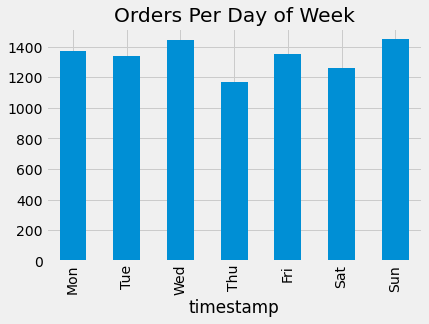

In [22]:
date_df.groupby(date_df.timestamp.dt.dayofweek).count().plot(kind='bar', legend=False, title='Orders Per Day of Week')
plt.xticks(range(7), ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"))

In [23]:
data_1['tod'] = data_1.timestamp.apply(lambda ts: ts.strftime('%H'))

<AxesSubplot:title={'center':'Orders By Hours of Day'}, xlabel='tod'>

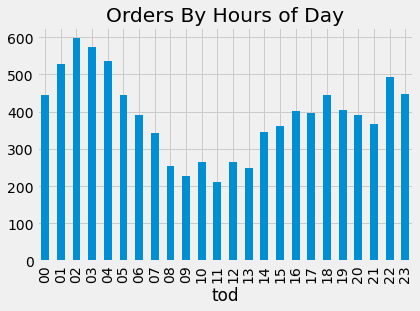

In [24]:
data_1.groupby('tod')['timestamp'].count().plot(kind='bar', legend=False, title='Orders By Hours of Day')

In [25]:
data_1['date_purchase'] = data_1.timestamp.apply(lambda ts: ts.strftime('%m-%d'))
data_1['date_install'] = data_1.install_date.apply(lambda ts: ts.strftime('%m-%d'))

In [26]:
daily_signup = data_1[['user_id','date_install']].groupby('date_install').nunique()
daily_signup.rename(columns={'user_id':'signup_users'},inplace=True)
daily_purchaser = data_1[['user_id','date_purchase']].groupby('date_purchase').nunique()
daily_purchaser.rename(columns={'user_id':'buy_users'},inplace=True)
df_target = daily_signup.join(daily_purchaser)
df_target

,signup_users,buy_users
date_install,,
08-01,200,129.0
08-02,180,175.0
08-03,229,198.0
08-04,181,247.0
08-05,252,250.0
08-06,204,259.0
08-07,215,282.0
08-08,173,254.0
08-09,175,231.0


The table above indicates that there are many transactions that happened without the users signing up as there are many days where the number of purchases is larger than the number of signed-up users.

# AB test

1. What metrics would you suggest to use to evaluate the performance of each variant? Why?

 - We can make the null hypothesis as: there is no differece of the AOV between the baseline and the four variants. The test statistic we use is the difference between CPA of the 2 groups.
   Hypothesis:

        - H0: AOV is no difference between the control and the treatments

        - H1: AOV in treatments is different than that in the control version

 - As the test is implemented at the product feed with the focus on reviews and discounted price. I think the most feasible goal of the testing feature is to increase engagement and conversion of the app user. With that said, the out-put metric here is the AOV after all the clicks and conversion and the input metrics are the CTR which is calculated by deviding clicks by impressions, and conversion rate which is coined by the formula: number of buys/number of clicks



2. Randomization unit here is the user. The question here is that do we target all the users or a specific segment of users. To answer this question let's analyze the user journey. Users first to go the app then they browse or search for products they are interested in. After they have found the producs they want to buy, they will add them to their shopping carts. Then they will start the checkout process, note that users will go back and forth between from browsing to checking out. For example, start the checkout and back to product browsing. Now we have a few options for the target population but which one will be the most reasonable for our goal. As the testing feature is right the main page, it makes sense to choose the user who is in the top of funnel as they will see testing feature when they land at the app. As most users belong to this funnel, the number of users for testing should be enough if not plentiful. So the users should be evenly distributed and randomly assigned to the variants right after they open the app. 

    - Determine the sample size for the experiment or how many users should be allocated randomly to each group is the first thing we need to do. Practical significance boundary is the first thing to consider when calculating the sample size. How much change is the change that matters from a business perspective given all the cost associated when making a change. For our case, how much increase in average order will be considered to outweigh the cost. Let's assume this number to be 1€ increase AOV per user to be practically significant. In other words, if AOV increases by 1€, we could launch the change to production. Next we need to choose the power of the test and significance level. We can use the industry standard 80% power(the probability of rejecting the null hypothesis) and 5% significance level. With these two factors, we could apply the formula that is 
           - sample size = 16 (based on α = 0.05 and β = 0.8) multiplied by sample variance(standard deviation of the population) divided by δ(delta) square, whereas δ is the difference between treatment and control
           - Assume the Std of our dataset is 10 and apply the formula, we need 1600 unique users for each variant
                 - We need 6400(1600*4) users in total
      -- Need less sample when larger change in δ and more sample when smaller change in power
      
    - Another important thing is the duration of the test. Bugfree and manageable traffic are the first 2 critical factors we need to consider before choosing how long we run the test.  
           

In [27]:
#this is the data structure to track CTR and conversion rate
{
    "data needed",
    "metrics": [
        {
            "variant": 1,
            "user": 1600,
            "impression": xxxx,
            "click": xxxx,
            "cart": xxxx,
            "buy": xxxx
        },
        {
            "variant": 2,
            "user": 1600,
            "impression": xxxx,
            "click": xxxx,
            "cart": xxxx,
            "buy": xxxx
        },
        {
            "variant": 3,
            "user": 1600,
            "impression": xxxx,
            "click": xxxx,
            "cart": xxxx,
            "buy": xxxx
            
        },
        {
            "variant": 4,
            "user": 1600,
            "impression": xxxx,
            "click": xxxx,
            "cart": xxxx,
            "buy": xxxx
        }
    ]
}

impression: everytime a product is shown
click: when users click on the products
cart: add item to cart
buy: purchase of goods


SyntaxError: invalid syntax (Temp/ipykernel_6684/2425608748.py, line 3)